In [37]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch

torch.set_printoptions(edgeitems=2, linewidth=75)
torch.manual_seed(123)

In [38]:
from torchvision import datasets
data_path = '../data-unversioned/p1ch7/'
# 标准集
cifar10 = datasets.CIFAR10(data_path, train=True, download=True) # <1>
# 验证集合
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True) # <2>

Files already downloaded and verified
Files already downloaded and verified


In [39]:
# url = "file:///Users/xuzhao/Desktop/ml/dlwpt-code/p1ch7/cifar-10-python.tar.gz"

In [40]:
# from load_data import load_cifar10_data
# img_rows, img_cols = 224, 224
# X_train, Y_train, X_valid, Y_valid = load_cifar10_data(img_rows, img_cols)

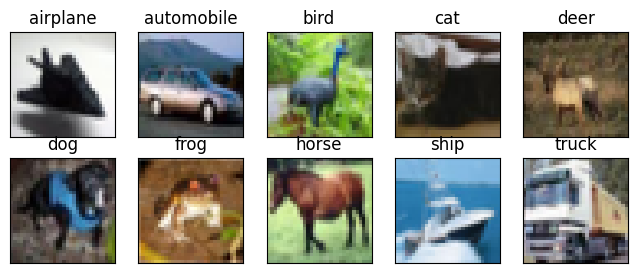

In [41]:

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
num_classes = 10
num = 0
# for img, label in cifar10:
#     print(img, label)
#     if num == 1:
#         ax = fig.add_subplot(2, 5, 1 + label, xticks=[], yticks=[])
#         ax.set_title(class_names[label])
#         plt.imshow(img)
#         plt.show()
#     num += 1
    # break
#
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    img = next(img for img, label in cifar10 if label == i)
    plt.imshow(img)
plt.show()

In [42]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

6


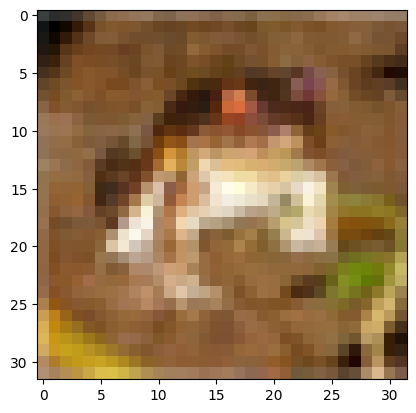

In [43]:
img_0 = cifar10.__getitem__(0)
# 获取image item
print(img_0[1])
plt.imshow(img_0[0])
plt.show()

In [44]:
len(cifar10)

50000

In [45]:
img, label = cifar10[99]
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32>, 1, 'automobile')

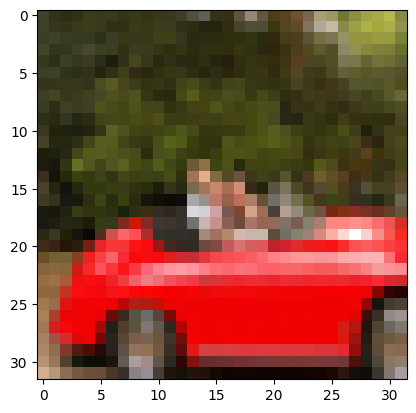

In [46]:
plt.imshow(img)
plt.show()

In [47]:
from torchvision import transforms
dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_pil_constants',
 '_presets',
 'autoaugment',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

In [48]:
from torchvision import transforms

to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [49]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                          transform=transforms.ToTensor())

In [50]:
img_t, _ = tensor_cifar10[99]
type(img_t)

torch.Tensor

In [51]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [52]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

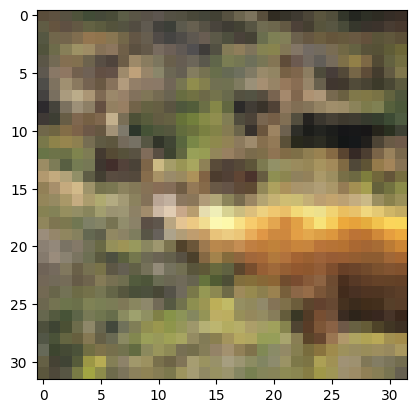

torch.Size([3, 32, 32])
torch.Size([32, 3, 32])
torch.Size([32, 32, 3])


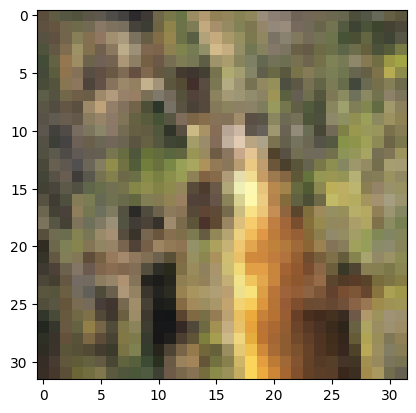

In [53]:
img, label = cifar10[98]
img_t, _ = tensor_cifar10[98]
plt.imshow(img)
plt.show()
print(img_t.size())
print(img_t.permute(2, 0, 1).size())
print(img_t.permute(2, 1, 0).size())
# 使用 permute 方法将维度顺序转换为 (channels, height, width)
plt.imshow(img_t.permute(2, 1, 0))
# plt.imshow(img_t.permute(2, 0, 1))
# plt.imshow(img_t.permute(1, 2, 0))
plt.show()

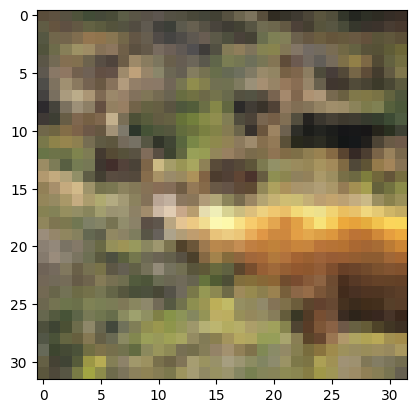

In [54]:
plt.imshow(img_t.permute(1, 2, 0))  # <1>
plt.show()

In [55]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [56]:
x = torch.randn(4, 4)
print(x.size())
print(x)
y = x.view(16)
print(y.size())
print(y)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(z.size())
print(z)
z1 = x.view(16,-1)
print(z1.size())
print(z1)
x1 = torch.randn(2,2,2)
print(x1.size())
print(x1)
# 重新返回当前数据的数据格式重新排列
z2 = x1.view(2,-1)
print(z2.size())
print(z2)

torch.Size([4, 4])
tensor([[ 0.3374, -0.1778, -0.3035, -0.5880],
        [ 0.3486,  0.6603, -0.2196, -0.3792],
        [ 0.7671, -1.1925,  0.6984, -1.4097],
        [ 0.1794,  1.8951,  0.4954,  0.2692]])
torch.Size([16])
tensor([ 0.3374, -0.1778, -0.3035, -0.5880,  0.3486,  0.6603, -0.2196,
        -0.3792,  0.7671, -1.1925,  0.6984, -1.4097,  0.1794,  1.8951,
         0.4954,  0.2692])
torch.Size([2, 8])
tensor([[ 0.3374, -0.1778, -0.3035, -0.5880,  0.3486,  0.6603, -0.2196,
         -0.3792],
        [ 0.7671, -1.1925,  0.6984, -1.4097,  0.1794,  1.8951,  0.4954,
          0.2692]])
torch.Size([16, 1])
tensor([[ 0.3374],
        [-0.1778],
        [-0.3035],
        [-0.5880],
        [ 0.3486],
        [ 0.6603],
        [-0.2196],
        [-0.3792],
        [ 0.7671],
        [-1.1925],
        [ 0.6984],
        [-1.4097],
        [ 0.1794],
        [ 1.8951],
        [ 0.4954],
        [ 0.2692]])
torch.Size([2, 2, 2])
tensor([[[ 0.3239, -0.1085],
         [ 0.2103, -0.3908]],

 

In [57]:
# views
# view(3,−1)保留了 3 个通道，并将剩余的所有
# 维度合并为一个维度，从而计算出适当的尺寸大小。这
# 里我们的 3×32×32 的图像被转换成一个 3×1024 的向量，
# 然后对每个通道的 1024 个元素取平均值
print(imgs.size())
img_view = imgs.view(3, -1)
print(img_view.size())
img_view_1 = imgs.view(-1, 3)
print(img_view_1.size())
# img_view_1 = imgs.view(4, -1)
# img_view_2 = imgs.view(4, 2)
img_a = imgs
print(imgs.view(3, -1))
imgs.view(3, -1).mean(dim=1)  # <1>

torch.Size([3, 32, 32, 50000])
torch.Size([3, 51200000])
torch.Size([51200000, 3])
tensor([[0.2314, 0.6039,  ..., 0.7647, 0.6392],
        [0.2431, 0.6941,  ..., 0.7451, 0.6392],
        [0.2471, 0.7333,  ..., 0.6706, 0.6314]])


tensor([0.4914, 0.4822, 0.4465])

In [58]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [59]:
transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4915, 0.4823, 0.4468), std=(0.247, 0.2435, 0.2616))

In [60]:
transformed_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    # 一般用Compose
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [61]:
transformed_cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


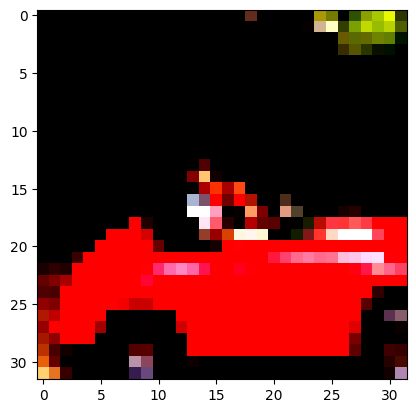

In [62]:
img_t, _ = transformed_cifar10[99]

plt.imshow(img_t.permute(1, 2, 0))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


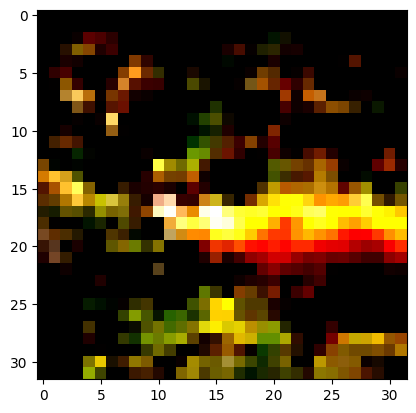

In [63]:
img_t, _ = transformed_cifar10[98]

plt.imshow(img_t.permute(1, 2, 0))
plt.show()